# 收益率数据

In [1]:
from zipline.research import returns

In [2]:
assets = ['000001','601118','000333','002024','002273','002030','300159','600771','600649','600866']
start = '2017-01-01'
end = '2018-05-18'

In [3]:
df = returns(assets, start, end)

[2018-05-24 03:03:30.938427] INFO: zipline.finance.metrics.tracker: 模拟1个交易日
首个开盘时间: 2018-05-18 01:31:00+00:00
最后收盘时间: 2018-05-18 07:00:00+00:00


In [4]:
df.shape

(334, 10)

In [5]:
# 转换为百分比，而非小数
r = df.multiply(100)
r.tail()

,平安银行(000001),海南橡胶(601118),美的集团(000333),苏宁易购(002024),水晶光电(002273),达安基因(002030),新研股份(300159),广誉远(600771),城投控股(600649),星湖科技(600866)
2018-05-14 00:00:00+00:00,1.544051,-3.052065,2.772093,4.101417,0.000000,-1.162791,-2.815534,0.797045,0.268097,-0.468096
2018-05-15 00:00:00+00:00,-0.536673,3.148148,-0.036206,0.000000,-1.861832,-0.117647,0.000000,6.692382,-0.133690,0.990099
2018-05-16 00:00:00+00:00,-1.978417,0.897666,-1.484969,-0.429799,-1.997004,3.062426,-1.498501,1.102675,-0.669344,0.980392
2018-05-17 00:00:00+00:00,-0.733945,-0.533808,-2.352941,-1.582734,-0.203770,-0.857143,0.304260,-0.196674,-0.673854,-1.941748
2018-05-18 00:00:00+00:00,1.293900,2.325581,1.449548,2.266082,-0.306279,-1.383285,-2.932255,-1.558581,0.814111,0.742574


In [6]:
mus = ((1 + df).cumprod().iloc[-1,:] - 1) * 100

In [7]:
mus

平安银行(000001)     22.198684
海南橡胶(601118)    -17.816092
美的集团(000333)    101.420295
苏宁易购(002024)     23.010639
水晶光电(002273)     -1.378579
达安基因(002030)    -26.084327
新研股份(300159)    -29.224418
广誉远(600771)      64.324163
城投控股(600649)    -63.470993
星湖科技(600866)    -42.514124
Name: 2018-05-18 00:00:00+00:00, dtype: float64

# 辅助函数

In [8]:
import numpy as np

In [9]:
def get_annual_returns(daily_returns):
    """
    年化收益率
    
    daily_returns: pd.DataFrame
        非累计小数收益率（不能为百分数）
        
    输出
    ----
        pd.Series
            各列年化收益率
    
    说明
    ----
        A股年均交易天数为244
    """
    # 首先计算对数收益率均值，然后调整为年收益率
    return np.log1p(daily_returns).mean() * 244

In [10]:
# 产生随机权重的函数
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

In [11]:
def compute_expectation(weights, annual_returns):
    """给定权重和平均收益率，计算期望值"""
    expectation = 0
    n = len(weights)
    for i in range(n):
        expectation += weights[i] * annual_returns[i]
    return expectation  

In [12]:
def compute_risk(weights, stds, corr):
    """
    给定权重、标准差及相关系数，计算组合方差
    
    其中:
        weights、std为序列
        corr为数据框
    """
    risk = 0
    n = len(weights)
    for i in range(n):
        for j in range(n):
            # 协方差为相关系数与方差乘积
            cov = corr.iloc[i,j] * stds[i] * stds[j]
            risk += weights[i]*weights[j]*cov
    return risk       

In [13]:
import pandas as pd

In [14]:
std = pd.Series([21.1,25.0,23.5,26.6,27.6,23.4,26.6])

In [15]:
weights = [0.3467,0.1606,0.0520,0.2083,0.1105,0.1068,0.0150]

In [16]:
corr = pd.DataFrame([[1.00,0.37,0.53,0.26,0.43,0.73,0.44],
                     [0.37,1.00,0.47,0.36,0.29,0.36,0.63],
                     [0.53,0.47,1.00,0.43,0.50,0.54,0.51],
                     [0.26,0.36,0.43,1.00,0.26,0.29,0.42],
                     [0.43,0.29,0.50,0.26,1.00,0.56,0.34],
                     [0.73,0.36,0.54,0.29,0.56,1.00,0.39],
                     [0.44,0.63,0.51,0.42,0.34,0.39,1.00]])


In [17]:
compute_risk(weights, std, corr)

297.4059670364441

In [18]:
mus = [15.7,21.7,18.3,17.3,14.8,10.5,17.2]

In [19]:
compute_expectation(weights, mus)

16.4982

# 年化与期间收益率

In [20]:
# 期间最终收益率
final_returns = ((1 + df).cumprod().iloc[-1,:] - 1) * 100
# 年化收益率
annual_returns = get_annual_returns(df)

In [21]:
final_returns

平安银行(000001)     22.198684
海南橡胶(601118)    -17.816092
美的集团(000333)    101.420295
苏宁易购(002024)     23.010639
水晶光电(002273)     -1.378579
达安基因(002030)    -26.084327
新研股份(300159)    -29.224418
广誉远(600771)      64.324163
城投控股(600649)    -63.470993
星湖科技(600866)    -42.514124
Name: 2018-05-18 00:00:00+00:00, dtype: float64

## 连续复合收益率转换为简单收益率

In [22]:
# 转换后与最终收益率相等
np.exp(annual_returns * df.shape[0] / 244) - 1

平安银行(000001)    0.221987
海南橡胶(601118)   -0.178161
美的集团(000333)    1.014203
苏宁易购(002024)    0.230106
水晶光电(002273)   -0.013786
达安基因(002030)   -0.260843
新研股份(300159)   -0.292244
广誉远(600771)     0.643242
城投控股(600649)   -0.634710
星湖科技(600866)   -0.425141
dtype: float64

# 模拟

In [23]:
# 运行时间大约为2分半钟
# Compute trade-off curve.
SAMPLES = 30000
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
n = len(assets)
annual_returns = get_annual_returns(df)
stds = r.std()
corr = r.corr()
for i in range(SAMPLES):
    weights = rand_weights(n)
    expectation = compute_expectation(weights, annual_returns)
    risk = compute_risk(weights, stds, corr)
    risk_data[i] = np.sqrt(risk)
    ret_data[i] = expectation

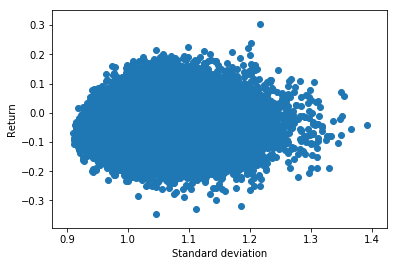

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(risk_data, ret_data)

plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

# 马科维茨模型

In [25]:
# 转换为百分数

Sigma = (np.log1p(df) * 100).cov().values

mus = (annual_returns * 100).values

In [26]:
from cvxpy import *
# 投资比例
w = Variable(shape=(n, 1))

gamma = Parameter(nonneg=True)
# 投资组合收益率
ret = mus.T * w
risk = quad_form(w, Sigma)
# 杠杆为1，且不得有空头头寸
constraints = [sum(w) == 1, w >= 0]
prob = Problem(Maximize(ret - gamma * risk), constraints)

In [27]:
# Compute trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = sqrt(risk).value
    ret_data[i] = ret.value

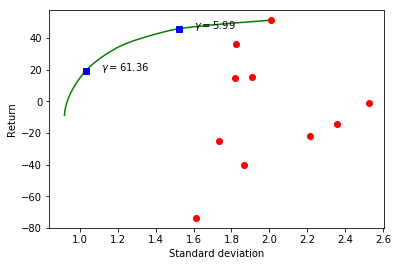

In [42]:
markers_on = [55, 75]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.08, ret_data[marker]-.03))
for i in range(n):
    plt.plot(sqrt(Sigma[i,i]).value, mus[i], 'ro')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


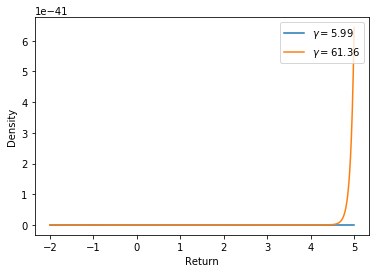

In [43]:
# Plot return distributions for two points on the trade-off curve.
import matplotlib.mlab as mlab
plt.figure()
for midx, idx in enumerate(markers_on):
    gamma.value = gamma_vals[idx]
    prob.solve()
    x = np.linspace(-2, 5, 1000)
    plt.plot(x, mlab.normpdf(x, ret.value, risk.value), label=r"$\gamma = %.2f$" % gamma.value)

plt.xlabel('Return')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()